## Discretisation (Rời rạc hóa)

Rời rạc hóa là quá trình biến đổi biến liên tục thành biến rời rạc bằng cách tạo một tập hợp các khoảng liền nhau trải dài phạm vi giá trị của biến. Discretisation còn được gọi là **binning**, trong đó bin là tên thay thế cho interval (khoảng).


### Rời rạc hóa giúp xử lý outlier và có thể cải thiện chênh lệch giá trị trong các biến bị lệch

Rời rạc hóa giúp xử lý outlier bằng cách đặt các giá trị này vào các khoảng thấp hoặc cao hơn cùng với các giá trị inlier còn lại của phân phối. Do đó, những quan sát ngoại lai này không còn khác biệt so với các giá trị còn lại ở đuôi của phân phối, vì giờ chúng đều ở cùng trong cùng một khoảng/bucket. Ngoài ra, rời rạc hóa giúp trải rộng các giá trị của một biến bị lệch trên một tập hợp các bin có số lượng quan sát bằng nhau bằng cách tạo các bin hoặc khoảng thích hợp.


### Các phương pháp Rời rạc hóa

Có một số cách biến đổi biến liên tục thành biến rời rạc. Các phương pháp rời rạc hóa được chia thành 2 loại: **có giám sát (supervised) và không có giám sát (unsupervised)**. Các phương pháp không có giám sát không sử dụng bất kỳ thông tin nào ngoài phân phối của biến để tạo các bin liền kề sẽ đặt các giá trị. Các phương pháp có giám sát thường sử dụng thông tin mục tiêu để tạo bin hoặc khoảng.


####  Các phương pháp rời rạc hóa không giám sát

- Rời rạc hóa sử dụng khoảng cách bằng nhau
- Rời rạc hóa sử dụng tần số bằng nhau
- Rời rạc hóa sử dụng K-means

#### Phương pháp rời rạc hóa có giám sát

- Rời rạc hóa sử dụng cây phân loại

## Equal width discretisation (Rời rạc hóa sử dụng khoảng cách bằng nhau)

Rời rạc hóa sử dụng khoảng cách bằng nhau chia phạm vi các giá trị thành N bin có cùng khoảng cách. Khoảng cách (width) được xác định bởi phạm vi giá trị trong biến và số bin mà chúng ta muốn sử dụng để chia biến:

width = (max value - min value) / N

trong đó N là số bin/khoảng.

Ví dụ: nếu các giá trị của biến thay đổi từ 0-100, chúng ta tạo 5 bin như sau: width = (100-0) / 5 = 20. Do đó, các bin là 0-20, 20-40, 40-60, 80 -100. Các bin đầu và cuối (0-20 và 80-100) có thể được mở rộng để chứa outlier (tức là các giá trị dưới 0 hoặc trên 100 cũng sẽ được đặt trong các bin đó).

Không có quy tắc chung để xác định N, điều này cần xác định bằng thực nghiệm.

## Trong bản mô phỏng này

Chúng ta sẽ học cách thực hiện rời rạc hóa sử dụng khoảng cách bằng nhau sử dụng tập dữ liệu Titanic với

- pandas và NumPy
- Feature-engine
- Scikit-learn

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisation import EqualWidthDiscretiser

In [17]:
# load các biến dạng số của tập dữ liệu Titanic

data = pd.read_csv('dataset/titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [18]:
# Hãy chia thành tập huấn luyện và tập kiểm tra
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

Các biến age và fare chứa dữ liệu bị khuyết, chúng ta sẽ điền vào bằng cách trích xuất một mẫu ngẫu nhiên của biến.

In [19]:
def impute_na(data, variable):

    df = data.copy()

    # lấy mẫu ngẫu nhiên
    df[variable + '_random'] = df[variable]

    # trích xuất mẫu ngẫu nhiên để điền na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas cần có các index tương tự để hợp nhất các tập dữ liệu
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [20]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

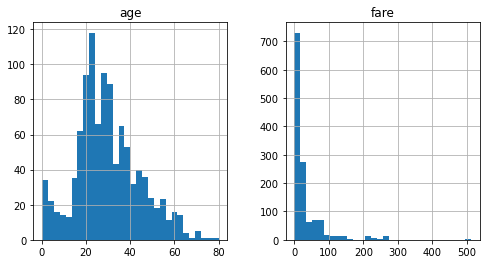

In [21]:
# hãy khám phá phân phối của age

data[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

### Rời rạc hóa sử dụng khoảng cách bằng nhau với pandas và NumPy

Trước tiên, chúng ta cần xác định các biên hoặc giới hạn của các khoảng.

In [22]:
# nắm bắt phạm vi của biến age
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
age_range = X_train['age'].max() - X_train['age'].min()

age_range

73.8333

<details><summary> Gợi ý </summary>

[max()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

</details>

In [23]:
# hãy chia phạm vi thành 8 bin có khoảng cách bằng nhau

age_range / 8

9.2291625

Phạm vi hoặc khoảng cách của các khoảng ~9 năm.

In [24]:
# nắm bắt giới hạn trên và dưới

## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:

min_value = int(np.floor( X_train['age'].min()))
max_value = int(np.ceil( X_train['age'].max()))

# làm tròn khoảng cách của bin
inter_value = int(np.round(age_range / 8))

min_value, max_value, inter_value

(0, 74, 9)

<details><summary> Gợi ý </summary>

[min()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)

[max()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

</details>

In [25]:
# nắm bắt giới hạn của khoảng để truyền vào 
# hàm pandas cut để tạo bin

## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]

intervals

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81]

In [28]:
# tạo nhãn để dán nhãn các bin khác nhau

## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:

labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9']

In [29]:
# tạo bin age/rời rạc hóa age

# tạo một cột có các nhãn
X_train['Age_disc_labels'] = pd.cut(x=X_train['age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)

# và một cột có các ranh giới bin
X_train['Age_disc'] = pd.cut(x=X_train['age'],
                             bins=intervals,
                             include_lowest=True)

X_train.head(10)

,age,fare,Age_disc_labels,Age_disc
501,13.0,19.5000,Bin_2,"(9.0, 18.0]"
588,4.0,23.0000,Bin_1,"(-0.001, 9.0]"
402,30.0,13.8583,Bin_4,"(27.0, 36.0]"
1193,40.5,7.7250,Bin_5,"(36.0, 45.0]"
686,22.0,7.7250,Bin_3,"(18.0, 27.0]"
971,39.0,7.8792,Bin_5,"(36.0, 45.0]"
117,30.0,56.9292,Bin_4,"(27.0, 36.0]"
540,2.0,26.0000,Bin_1,"(-0.001, 9.0]"
294,49.0,110.8833,Bin_6,"(45.0, 54.0]"
261,35.0,26.2875,Bin_4,"(27.0, 36.0]"


Như đã thấy, bằng cách rời rạc hóa sử dụng khoảng cách bằng nhau, chúng ta đặt mỗi quan sát Age trong một khoảng / bin. Ví dụ: age=13 được đặt trong khoảng 9-18, trong khi age=30 được đặt trong khoảng 27-36.

Khi thực hiện rời rạc hóa sử dụng khoảng cách bằng nhau, chúng ta đảm bảo rằng tất cả các khoảng đều có cùng độ dài, tuy nhiên không nhất thiết phải có cùng số lượng quan sát ở mỗi khoảng. Hãy xem bên dưới: 

In [30]:
X_train.groupby('Age_disc')['age'].count()

Age_disc
(-0.001, 9.0]     64
(9.0, 18.0]       88
(18.0, 27.0]     279
(27.0, 36.0]     229
(36.0, 45.0]     120
(45.0, 54.0]      78
(54.0, 63.0]      43
(63.0, 72.0]      14
(72.0, 81.0]       1
Name: age, dtype: int64

Text(0, 0.5, 'Number of observations per bin')

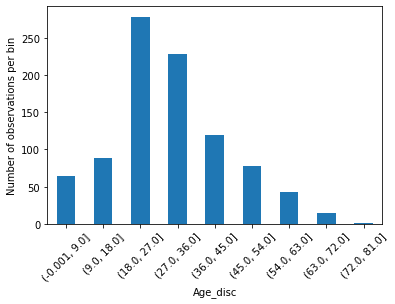

In [31]:
X_train.groupby('Age_disc')['age'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Phần lớn mọi người trên tàu Titanic từ 18-36 tuổi.

Giờ đây, chúng ta có thể rời rạc hóa Age trong tập kiểm tra, sử dụng cùng các ranh giới khoảng đã tính cho tập huấn luyện: 

In [32]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:

X_test['Age_disc_labels'] = pd.cut(x=X_test['age'],
                                   bins=intervals,
                                   labels=labels,
                                   include_lowest=True)

X_test['Age_disc'] = pd.cut(x=X_test['age'],
                            bins=intervals,
                            include_lowest=True)

X_test.head()

,age,fare,Age_disc_labels,Age_disc
1139,38.0,7.8958,Bin_5,"(36.0, 45.0]"
533,21.0,21.0000,Bin_3,"(18.0, 27.0]"
459,42.0,27.0000,Bin_5,"(36.0, 45.0]"
1150,3.0,14.5000,Bin_1,"(-0.001, 9.0]"
393,25.0,31.5000,Bin_3,"(18.0, 27.0]"


<details><summary> Gợi ý </summary>

[cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

</details>

Text(0, 0.5, 'Number of observations per bin')

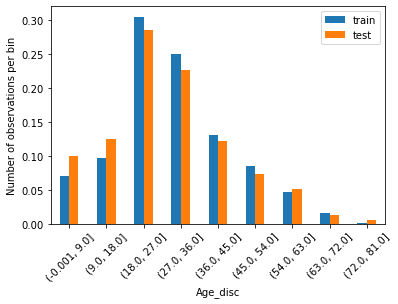

In [33]:
# nếu phân phối trong tập huấn luyện và tập kiểm tra tương tự, chúng ta kỳ vọng tỷ lệ tương tự của
# quan sát ở các khoảng khác nhau trong tập huấn luyện và tập kiểm tra
# hãy xem bên dưới

## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
t1 = X_train.groupby(['Age_disc'])['age'].count() / len(X_train)
t2 = X_test.groupby(['Age_disc'])['age'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

### Rời rạc hóa sử dụng khoảng cách bằng nhau với Feature-Engine

In [34]:
# Hãy chia thành tập huấn luyện và tập kiểm tra

## Yêu cầu 9:
## VIẾT CODE Ở ĐÂY:

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

In [35]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:

X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

In [36]:
# với feature-engine, chúng ta có thể tự động hóa quá trình cho nhiều biến
# trong 1 dòng code

## Yêu cầu 11:
## VIẾT CODE Ở ĐÂY:
disc = EqualWidthDiscretiser(bins=8, variables = ['age', 'fare'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=8, variables=['age', 'fare'])

<details><summary> Gợi ý </summary>

[EqualWidthDiscretiser()](https://feature-engine.readthedocs.io/en/0.6.x_a/discretisers/EqualWidthDiscretiser.html)

</details>

In [37]:
# trong dict binner, chúng ta thấy giới hạn của các khoảng cho age
# giá trị tăng khoảng 9 năm từ 1 bin tới bin tiếp theo

# với fare, nó tăng khoảng 60-70 USD từ một khoảng tới khoảng tiếp theo,
# nhưng nó luôn tăng cùng một giá trị hay cùng khoảng cách.

disc.binner_dict_

{'age': [-inf,
  9.3958625,
  18.625024999999997,
  27.854187499999995,
  37.083349999999996,
  46.3125125,
  55.54167499999999,
  64.7708375,
  inf],
 'fare': [-inf,
  64.04115,
  128.0823,
  192.12345,
  256.1646,
  320.20575,
  384.2469,
  448.28805,
  inf]}

In [38]:
# biến đổi train và test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [39]:
train_t.head()

,age,fare
501,1,0
588,0,0
402,3,0
1193,2,0
686,2,0


Text(0, 0.5, 'Number of observations per bin')

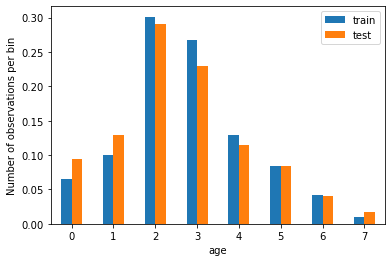

In [40]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

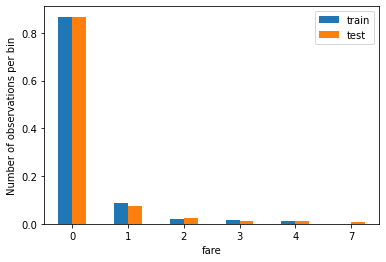

In [41]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Chúng ta có thể thấy khá rõ ràng, rời rạc hóa sử dụng khoảng cách bằng nhau không cải thiện chênh lệch giá trị. Biến fare ban đầu và biến rời rạc bị lệch.

### Rời rạc hóa sử dụng khoảng cách bằng nhau với Scikit-learn

In [42]:
# Hãy chia thành tập huấn luyện và tập kiểm tra

## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

In [43]:
# thay NA ở cả tập huấn luyện và tập kiểm tra

## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm function ```impute_na()``` ở trên

</details>

In [44]:
## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:
disc = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')

disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=8, strategy='uniform')

<details><summary> Gợi ý </summary>

[KBinsDiscretizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

</details>

In [45]:
disc.bin_edges_

array([array([ 0.1667   ,  9.3958625, 18.625025 , 27.8541875, 37.08335  ,
              46.3125125, 55.541675 , 64.7708375, 74.       ])           ,
       array([  0.     ,  64.04115, 128.0823 , 192.12345, 256.1646 , 320.20575,
              384.2469 , 448.28805, 512.3292 ])                                ],
      dtype=object)

In [46]:
train_t = disc.transform(X_train[['age', 'fare']])

train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])

train_t.head()

,age,fare
0,1.0,0.0
1,0.0,0.0
2,3.0,0.0
3,2.0,0.0
4,2.0,0.0


In [47]:
test_t = disc.transform(X_test[['age', 'fare']])

test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

Text(0, 0.5, 'Number of observations per bin')

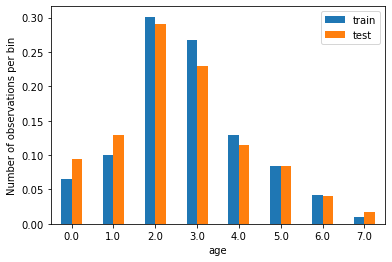

In [48]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

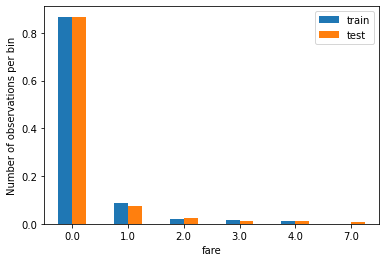

In [49]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Equal frequency discretisation (Rời rạc hóa sử dụng tần số bằng nhau)

Rời rạc hóa sử dụng tần số bằng nhau chia phạm vi các giá trị có thể có của biến thành N bin, trong đó mỗi bin chứa cùng một lượng quan sát. Điều này đặc biệt hữu ích với các biến bị lệch vì nó trải đều các quan sát trên các bin khác nhau. Chúng ta tìm các ranh giới của khoảng bằng cách xác định quantile.

Rời rạc hóa sử dụng tần số bằng nhau dùng quantile gồm việc chia biến liên tục thành N quantile; trong đó, N được người dùng xác định.

Rời rạc hóa sử dụng tần số bằng nhau rất dễ thực hiện: bằng cách trải đều giá trị của các quan sát; nó giúp tăng chất lượng của thuật toán. Việc phân loại tùy ý này cũng có thể làm gián đoạn mối quan hệ với mục tiêu.

## Trong bản mô phỏng này

Chúng ta sẽ học cách thực hiện rời rạc hóa sử dụng tần số bằng nhau, dùng tập dữ liệu Titanic với

- pandas và NumPy
- Feature-engine
- Scikit-learn

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisation import EqualFrequencyDiscretiser

In [51]:
# load các biến dạng số của tập dữ liệu Titanic 

data = pd.read_csv('dataset/titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [53]:
# Hãy chia thành tập huấn luyện và tập kiểm tra
## Yêu cầu 15:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

Các biến age và fare chứa dữ liệu bị khuyết, chúng ta sẽ điền vào bằng cách trích xuất một mẫu ngẫu nhiên của biến.

In [54]:
def impute_na(data, variable):
    # hàm để điền NA với mẫu ngẫu nhiên

    df = data.copy()

    # lấy mẫu ngẫu nhiên
    df[variable+'_random'] = df[variable]

    # trích xuất mẫu ngẫu nhiên để điền na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas cần index tương tự để hợp nhất các tập dữ liệu
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [55]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

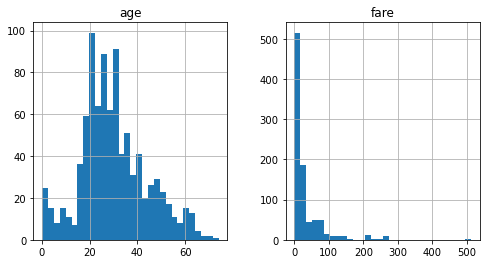

In [56]:
# hãy khám phá phân phối của age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

### Rời rạc hóa sử dụng tần số bằng nhau với pandas và NumPy

Giới hạn khoảng là giới hạn quantile. Chúng ta có thể tìm với pandas qcut.

In [57]:
# hãy sử dụng pandas qcut (quantile cut) và chỉ ra
# chúng ta muốn 10 bin.

# retbins = True thể hiện chúng ta muốn nắm bắt các giới hạn
# của từng khoảng (để chia tập kiểm tra)

## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:
Age_disccretised, intervals = pd.qcut(
    X_train['age'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([Age_disccretised, X_train['age']], axis=1).head(10)

,age,age
501,"(0.166, 16.0]",13.0
588,"(0.166, 16.0]",4.0
402,"(28.0, 31.0]",30.0
1193,"(20.0, 22.25]",21.0
686,"(20.0, 22.25]",22.0
971,"(0.166, 16.0]",16.0
117,"(28.0, 31.0]",30.0
540,"(0.166, 16.0]",2.0
294,"(42.0, 50.0]",49.0
261,"(31.0, 36.0]",35.0


<details><summary> Gợi ý </summary>

[qcut()](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)

</details>

Chúng ta thấy cách đặt mỗi quan sát Age trong một khoảng bằng cách rời rạc hóa sử dụng quantile qua kết quả ở trên. Ví dụ: age=30 được xếp vào khoảng 28-31, trong khi age=49 được xếp vào khoảng 42-50.

Lưu ý khoảng cách của các khoảng (interval) khác nhau như thế nào.

Chúng ta có thể hình dung các điểm cắt khoảng bên dưới: 

In [58]:
intervals

array([ 0.1667, 16.    , 20.    , 22.25  , 25.    , 28.    , 31.    ,
       36.    , 42.    , 50.    , 74.    ])

Và vì chúng ta tạo ra các bin bằng phương thức quantile cut nên sẽ có số lượng quan sát gần như bằng nhau ở mỗi bin. Xem bên dưới.

In [59]:
# số hành khách gần như tương tự ở mỗi khoảng

Age_disccretised.value_counts()

(31.0, 36.0]     106
(0.166, 16.0]    103
(25.0, 28.0]      95
(22.25, 25.0]     94
(42.0, 50.0]      92
(16.0, 20.0]      91
(28.0, 31.0]      91
(36.0, 42.0]      84
(20.0, 22.25]     81
(50.0, 74.0]      79
Name: age, dtype: int64

In [60]:
# thay vì có các ranh giới khoảng, chúng ta cũng có thể thêm nhãn vào bin như sau:

labels = ['Q'+str(i) for i in range(1,11)]
labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [61]:
Age_disccretised, intervals = pd.qcut(X_train['age'], 10, labels=labels,
                                      retbins=True,
                                      precision=3, duplicates='raise')

Age_disccretised.head()

501     Q1
588     Q1
402     Q6
1193    Q3
686     Q3
Name: age, dtype: category
Categories (10, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' ... 'Q7' < 'Q8' < 'Q9' < 'Q10']

In [62]:
# áp dụng các khoảng vào tập kiểm tra, chúng ta cần mở rộng
# giới hạn của các bin ngoài thành -inf và +inf để nếu
# trong tập kiểm tra có các giá trị nhỏ hơn hoặc lớn hơn
# giá trị min/max trong tập huấn luyện, chúng có thể bị
# dồn vào các khoảng ngoài.
# Nếu không, chúng sẽ bị thay bằng NaN.

# Thêm vào trước/Nối các phần vô hạn để điều chỉnh outlier
intervals[0] = float("-inf")
intervals[len(intervals) - 1] = float("inf")

intervals

array([ -inf, 16.  , 20.  , 22.25, 25.  , 28.  , 31.  , 36.  , 42.  ,
       50.  ,   inf])

In [63]:
# biến đổi tập kiểm tra:
# chúng ta sử dụng phương thức pandas cut (thay vì qcut) và
# truyền vào biên quantile đã tính trong tập huấn luyện

X_test['Age_disc_label'] = pd.cut(x = X_test['age'], bins=intervals, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test['age'], bins=intervals)

X_test.head(10)

,age,fare,Age_disc_label,Age_disc
1139,38.0,7.8958,Q8,"(36.0, 42.0]"
533,21.0,21.0000,Q3,"(20.0, 22.25]"
459,42.0,27.0000,Q8,"(36.0, 42.0]"
1150,34.0,14.5000,Q7,"(31.0, 36.0]"
393,25.0,31.5000,Q4,"(22.25, 25.0]"
1189,4.0,16.7000,Q1,"(-inf, 16.0]"
5,48.0,26.5500,Q9,"(42.0, 50.0]"
231,52.0,30.5000,Q10,"(50.0, inf]"
330,57.0,13.0000,Q10,"(50.0, inf]"
887,32.0,8.1125,Q7,"(31.0, 36.0]"


In [64]:
X_test['Age_disc_label'].isnull().sum()

0

<AxesSubplot:xlabel='Age_disc'>

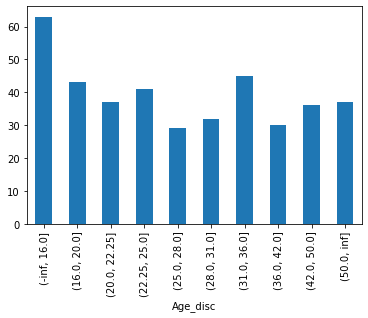

In [65]:
# kiểm tra xem chúng ta đã có tần số bằng nhau chưa (số quan sát như nhau ở mỗi bin)
X_test.groupby('Age_disc')['age'].count().plot.bar()

Có thể thấy rằng các khoảng trên cùng có ít quan sát hơn. Điều này có thể xảy ra với các phân phối lệch nếu chúng ta cố gắng chia trong một số lượng lớn các khoảng. Để làm cho chệnh lệch giá trị đồng nhất hơn, chúng ta cần rời rạc hóa trong khoảng ngắn hơn.

### Rời rạc hóa sử dụng tần số bằng nhau với Feature-Engine

In [66]:
# Hãy chia thành tập huấn luyện và tập kiểm tra
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

In [67]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

In [68]:
# với feature-engine, chúng ta có thể tự động hóa quá trình cho nhiều biến
# trong một dòng code
## Yêu cầu 20:
## VIẾT CODE Ở ĐÂY:
disc = EqualFrequencyDiscretiser(q=10, variables = ['age', 'fare'])

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['age', 'fare'])

<details><summary> Gợi ý </summary>

[EqualFrequencyDiscretiser()](https://feature-engine.readthedocs.io/en/0.6.x_a/discretisers/EqualFrequencyDiscretiser.html)

</details>

In [69]:
# trong dict binner, chúng ta thấy giới hạn của các khoảng. Lưu ý rằng
# các khoảng có khoản cách khác nhau

disc.binner_dict_

{'age': [-inf,
  16.0,
  20.0,
  22.25000000000003,
  25.0,
  28.0,
  31.0,
  36.0,
  42.0,
  50.0,
  inf],
 'fare': [-inf,
  7.55,
  7.7958,
  8.05,
  10.5,
  14.4542,
  21.075,
  26.55,
  40.125,
  79.025,
  inf]}

In [70]:
# biến đổi train và test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [71]:
train_t.head()

,age,fare
501,0,5
588,0,6
402,5,4
1193,2,1
686,2,1


Text(0, 0.5, 'Number of observations per bin')

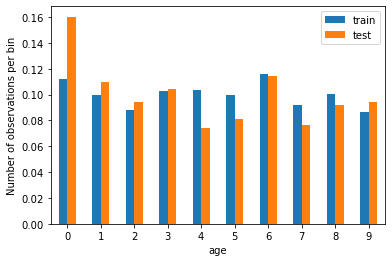

In [72]:
# giờ hãy khám phá số quan sát ở mỗi bucket

t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

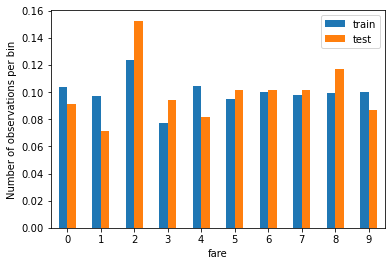

In [73]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Lưu ý rằng rời rạc hóa sử dụng tần số bằng nhau có chệnh lệch giá trị tốt hơn trên các khoảng khác nhau.

### Rời rạc hóa sử dụng tần số bằng nhau với Scikit-learn

In [74]:
# Hãy chia thành tập huấn luyện và tập kiểm tra
## Yêu cầu 21:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

In [75]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 22:
## VIẾT CODE Ở ĐÂY:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

In [76]:
## Yêu cầu 23:
## VIẾT CODE Ở ĐÂY:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

<details><summary> Gợi ý </summary>

[KBinsDiscretizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

</details>

In [77]:
disc.bin_edges_

array([array([ 0.1667, 16.    , 20.    , 22.25  , 25.    , 28.    , 31.    ,
              36.    , 42.    , 50.    , 74.    ])                          ,
       array([  0.    ,   7.55  ,   7.7958,   8.05  ,  10.5   ,  14.4542,
               21.075 ,  26.55  ,  40.125 ,  79.025 , 512.3292])         ],
      dtype=object)

In [78]:
train_t = disc.transform(X_train[['age', 'fare']])

train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])

train_t.head()

,age,fare
0,0.0,5.0
1,0.0,6.0
2,5.0,4.0
3,2.0,1.0
4,2.0,1.0


In [79]:
test_t = disc.transform(X_test[['age', 'fare']])

test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

Text(0, 0.5, 'Number of observations per bin')

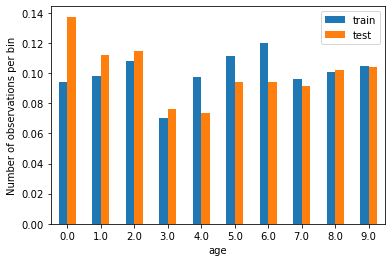

In [80]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

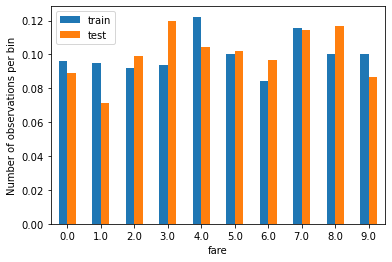

In [81]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')